In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'svg'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'RTpcX0dpdEh1YlxhcmFuYXVyLnJiaW5kLmlvXGxlY3R1cmVzXGtzZVxwcm9iX3N0YXRcdmlkZW9z'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

{"C:\\Python\\Python311\\Lib\\importlib\\_bootstrap.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\importlib\\_bootstrap_external.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\zipimport.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\codecs.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\encodings\\aliases.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\encodings\\__init__.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\encodings\\utf_8.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\encodings\\cp1252.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\abc.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\io.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\stat.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\_collections_abc.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\genericpath.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\ntpath.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\os.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\_sitebuiltins.py": 1686106818.0, "C:\\Users\\ihorm\\App

In [2]:
#| label: setup
#| include: false

from matplotlib import pyplot
import numpy
import math
from tqdm import tqdm
from collections import namedtuple

from scipy.stats import binom, chi2, chisquare, chi2_contingency, \
                        randint, kstest, norm, poisson
from statsmodels.stats.proportion import proportion_confint

numpy.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

# Define colors
red_pink   = "#e64173"
turquoise  = "#20B2AA"
orange     = "#FFA500"
red        = "#fb6107"
blue       = "#181485"
navy       = "#150E37FF"
green      = "#8bb174"
yellow     = "#D8BD44"
purple     = "#6A5ACD"
slate      = "#314f4f"

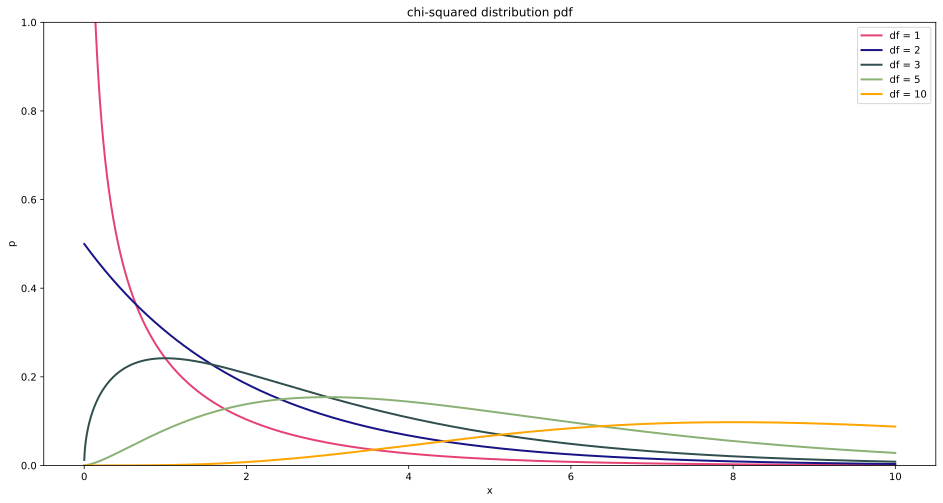

In [3]:
#| label: chi2_distribution
#| echo: false
#| fig-align: center

x_axis = numpy.arange(start=0.001, stop=10, step=0.001)

pyplot.figure(figsize=(16, 8))

pyplot.plot(x_axis, chi2.pdf(x=x_axis, df=1), red_pink, 
            linewidth=2.0, label='df = 1')
pyplot.plot(x_axis, chi2.pdf(x=x_axis, df=2), blue,
            linewidth=2.0, label='df = 2')
pyplot.plot(x_axis, chi2.pdf(x=x_axis, df=3), slate,
            linewidth=2.0, label='df = 3')
pyplot.plot(x_axis, chi2.pdf(x=x_axis, df=5), green, 
            linewidth=2.0, label='df = 5')
pyplot.plot(x_axis, chi2.pdf(x=x_axis, df=10), orange,
            linewidth=2.0, label='df = 10')

pyplot.gca().set_ylim(bottom=0, top=1)

pyplot.legend(loc='best', frameon=True)
pyplot.title("chi-squared distribution pdf")
pyplot.xlabel("x")
pyplot.ylabel("p")

pyplot.show()

In [4]:
#| include: false

table = [[932299, 680684, 794884, 585978, 470660, 397554], [490658, 519094, 648085, 416680, 347016, 315555], [223166, 347325, 306182, 219092, 254512, 237701], [204310, 426824, 277656, 127961, 237965, 220446]]

In [5]:
#| include: false

table = [[3243, 432, 108, 66], [3045, 421, 128, 83]]

In [6]:
#| include: false

table = [[15, 18], [15, 13]]

In [7]:
#| include: false

MonteCarloResults= namedtuple('MonteCarloResults', ['positive_rate',
                                                    'confint_left_bound',
                                                    'confint_right_bound'])

def gen_monte_carlo_exp_for_chi_sq_homogenity(n, p1, p2, correction, alpha, N_runs):
    """
        Функция для проверки критерия однородности хи-квадрат 
            с помощью метода Монте-Карло
        
        Возвращает долю отвержений гипотезы и доверительный интервал для этой доли
    
        Параметры:
            - n: параметр биномиального распределения общий для двух распределений, 
                    объем выборки
            - p1: параметр первого биномиального распределения, 
                    вероятность успеха в испытании
            - p2: параметр второго биномиального распределения, 
                    вероятность успеха в испытании
            - correction: применяем ли поправку Йейтса
            - alpha: уровень значимости
            - N_runs: число экспериментов в методе Монте-Карло
    """
    
    positive = 0
    
    for _ in range(N_runs): 

        n_1_1 = binom.rvs(n, p1)
        n_1_2 = n - n_1_1
        n_2_1 = binom.rvs(n, p2)
        n_2_2 = n - n_2_1
        
        if (n_1_1+n_2_1 != 0) and (n_1_2+n_2_2 != 0):
            pvalue = chi2_contingency(observed=[[n_1_1, n_1_2], [n_2_1, n_2_2]],
                                      correction = correction)[1]
        else:
            pvalue = 1
    
        if pvalue<=alpha:
            positive+=1
            
    positive_rate = positive/N_runs
    confint = proportion_confint(count = positive, nobs = N_runs,
                                 alpha = 0.05, method='wilson')
        
    return MonteCarloResults(**{'positive_rate': positive_rate,
                                'confint_left_bound': confint[0],
                                'confint_right_bound': confint[1]})

FPR_list_w_yates = []
FPR_list_wo_yates = []

# перебираем размер выборки n
for i in tqdm(numpy.arange(2, 30, 2, dtype = int)):  
    mmk_res_w_yates = gen_monte_carlo_exp_for_chi_sq_homogenity(n = i, 
                                                                p1 = 0.3,
                                                                p2 = 0.3, 
                                                                correction = True,
                                                                alpha = 0.05, 
                                                                N_runs = 10000)
    FPR_list_w_yates.append([i, mmk_res_w_yates])
    
    mmk_res_wo_yates = gen_monte_carlo_exp_for_chi_sq_homogenity(n = i, 
                                                                 p1 = 0.3,
                                                                 p2 = 0.3, 
                                                                 correction = False,
                                                                 alpha = 0.05, 
                                                                 N_runs = 10000)
    FPR_list_wo_yates.append([i, mmk_res_wo_yates])

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:25,  1.97s/it]

 14%|█▍        | 2/14 [00:04<00:25,  2.16s/it]

 21%|██▏       | 3/14 [00:06<00:24,  2.27s/it]

 29%|██▊       | 4/14 [00:09<00:23,  2.32s/it]

 36%|███▌      | 5/14 [00:11<00:21,  2.35s/it]

 43%|████▎     | 6/14 [00:13<00:19,  2.39s/it]

 50%|█████     | 7/14 [00:16<00:16,  2.41s/it]

 57%|█████▋    | 8/14 [00:18<00:14,  2.41s/it]

 64%|██████▍   | 9/14 [00:21<00:12,  2.43s/it]

 71%|███████▏  | 10/14 [00:23<00:09,  2.44s/it]

 79%|███████▊  | 11/14 [00:26<00:07,  2.45s/it]

 86%|████████▌ | 12/14 [00:28<00:04,  2.45s/it]

 93%|█████████▎| 13/14 [00:31<00:02,  2.46s/it]

100%|██████████| 14/14 [00:33<00:00,  2.46s/it]

100%|██████████| 14/14 [00:33<00:00,  2.40s/it]

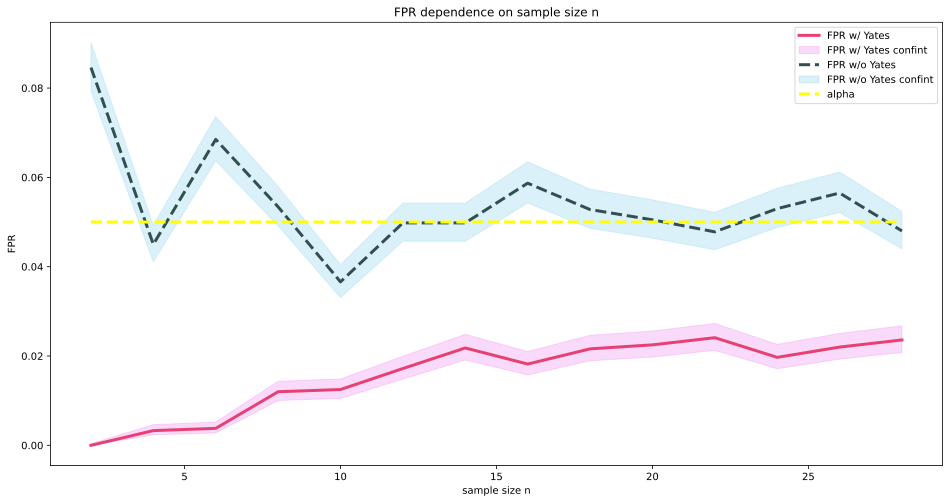

In [8]:
#| echo: false

pyplot.figure(figsize=(16, 8))


pyplot.plot([elem[0] for elem in FPR_list_w_yates],
            [elem[1].positive_rate for elem in FPR_list_w_yates],
            color = red_pink, linewidth=3.0, label='FPR w/ Yates')
pyplot.fill_between([elem[0] for elem in FPR_list_w_yates],
                    [elem[1].confint_left_bound for elem in FPR_list_w_yates],
                    [elem[1].confint_right_bound for elem in FPR_list_w_yates],
                    color = 'violet', alpha = 0.3, label='FPR w/ Yates confint')


pyplot.plot([elem[0] for elem in FPR_list_wo_yates],
            [elem[1].positive_rate for elem in FPR_list_wo_yates],
            color = slate, linestyle = 'dashed', 
            linewidth=3.0, label='FPR w/o Yates')
pyplot.fill_between([elem[0] for elem in FPR_list_wo_yates],
                    [elem[1].confint_left_bound for elem in FPR_list_wo_yates],
                    [elem[1].confint_right_bound for elem in FPR_list_wo_yates],
                    color = 'skyblue', alpha = 0.3, 
                    label='FPR w/o Yates confint')

pyplot.plot([elem[0] for elem in FPR_list_w_yates],
            numpy.array([0.05]*len(FPR_list_w_yates)),
            color = 'yellow', linestyle = 'dashed', linewidth=3.0, label='alpha')

pyplot.legend(loc='best')
pyplot.title("FPR dependence on sample size n")
pyplot.xlabel("sample size n")
pyplot.ylabel("FPR")

pyplot.show()